# Report: Data analysis of diabetes and chronic kidney disease 


## The research question is:  What factors have influence on getting diabetes and chronic kidney disease? as well as whether there is a relationship between these diseases?


## 1. Introduction 

Diabetes and chronic kidney disease are formidable health challenges that pose significant threats to individuals' well-being, often leading to severe complications and, in extreme cases, mortality. Recognizing the critical need for early detection and diagnosis, this project endeavors to employ predictive modeling techniques on two distinct datasets to find effect of different features on two diseases.



### Dataset 1: Chronic_Kidney_Disease
* Metadata URL: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
* Data URL: https://github.com/aiplanethub/Datasets/blob/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv
* Data Type: CSV

#### Context
Chronic Kidney Disease (CKD) is characterized by kidney damage, leading to impaired blood filtration and potential health complications such as heart disease and stroke. 
This dataset has been collected from the hospital nearly 2 months of period, and can be used to predict the chronic kidney disease. 


#### Content
The dataset consists of 24 medical predictor variables and one target variable, Outcome. 
the dataset variables:
            age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo	-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet	-	appetite
			pe		-	pedal edema
			ane		-	anemia

 

By scrutinizing the dataset, the goal is to unravel patterns and insights that contribute to the early detection and understanding of chronic kidney disease.

### Dataset 2: Pima Indians Diabetes Database

* Metadata URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data
* Data URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data?select=diabetes.csv
* Data Type: CSV

#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
This dataset consists of several medical predictor variables include : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
and one target variable, Outcome.  

#### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.


 
### Motivation

Through a meticulous examination of these datasets, our overarching goal is not only to predict the presence of diabetes and chronic kidney disease but also to discern the key factors influencing these predictions. Additionally, we strive to elucidate potential relationships between these two distinct yet interconnected health concerns. 

## 2. Methods 
In this project I created a Pipeline involves organizing the different stages of the machine learning workflow into a systematic and automated process. my method consists of the following steps:
* Data Collection: Collect raw data from two open access Datasets 
* Data Cleaning: Handle missing values, outliers, and errors.
* Feature Scaling/Normalization: Scale numerical features to ensure consistent scales across different features.
 Data Encoding:
* Convert categorical variables into a numerical format (e.g., one-hot encoding).
* Unit test and integration test
* Model Selection: Choose the appropriate machine learning algorithm(s) based on the nature of the problem (classification).
* Evaluate the final model on the testing dataset to estimate its generalization performance.
* Model Deployment: Deploy the trained model for making predictions on new, unseen data.
 
### 2-1. Preparing the code environment
* VS vode as IDE 
* Install dependencies
Initially, install all required dependencies. 


In [ ]:

%pip install attrs==22.2.0
%pip install greenlet==2.0.2
%pip install iniconfig==2.0.0
%pip install numpy==1.24.2
%pip install packaging==23.0
%pip install pandas==1.5.3
%pip install pluggy==1.0.0
%pip install python-dateutil==2.8.2
%pip install pytz==2022.7.1
%pip install six==1.16.0
%pip install SQLAlchemy==1.4.46
%pip install typing_extensions==4.5.0

### 2-2. Create Pipeline

In [77]:


from sqlalchemy import create_engine
import pandas as pd
from pandas.io import sql
import sqlite3
import requests
import os
from pathlib import Path
import numpy as np
from scipy import stats
from scipy.stats import zscore, iqr
class Pipeline:
 
    def __init__(self, file1_path, file2_path):
        self.file1_path = file1_path
        self.file2_path = file2_path

        self.df1 = None
        self.df2 = None
       
       
    def read_csv_files(self):
        self.df2 = pd.read_csv(self.file2_path)
        self.df1 = pd.read_csv(self.file1_path)
        
        self.df1 = self.df1.drop(columns=['id'])
        new_column_names = {
            'age': 'Age',
            'bp': 'Blood_Pressure',
            'sg': 'Specific_Gravity',
            'al': 'Albumin',
            'su': 'Sugar',
            'rbc': 'Red_Blood',
            'pc': 'Pus_Cell',
            'pcc': 'Pus_Cell_clumps',
            'ba': 'Bacteria',
            'bgr': 'Blood_Glucose_Random',
            'bu': 'Blood_Urea',
            'sc': 'Serum_Creatinine',
            'sod': 'Sodium',
            'pot': 'Potassium',
            'hemo': 'Hemoglobin',
            'pcv': 'Packed_Cell_Volume',
            'wc': 'White_Blood_Cell_Count',
            'rc': 'Red_Blood_Cell_Count',
            'htn': 'Hypertension',
            'dm': 'Diabetes_Mellitus',
            'cad': 'Coronary_Artery_Disease',
            'appet': 'Appetite',
            'pe': 'Pedal_Edema',
            'ane': 'Anemia',
            'Outcome': 'Outcome',                 
            }

        self.df1 = self.df1.rename(columns=new_column_names)
        

    def normal_to_binary(self):
        # Iterate over columns
        for column in self.df1.columns:
            unique_values = self.df1[column].dropna().unique()
            if set(unique_values) == {'normal', 'abnormal'}:
                # Replace "normal" with 0, "abnormal" with 1, and missing values with the majority value
                self.df1[column] = self.df1[column].map({'normal': 0, 'abnormal': 1})
                majority_value = self.df1[column].mode().iloc[0]
                self.df1[column] = self.df1[column].fillna(majority_value)   
                         
    def present_to_binary(self):
        # Iterate over columns
        for column in self.df1.columns:
            unique_values = self.df1[column].dropna().unique()
            if set(unique_values) == {'notpresent', 'present'}:
                # Replace "notpresent" with 0, "present" with 1, and missing values with the majority value
                self.df1[column] = self.df1[column].map({'notpresent': 0, 'present': 1})
                majority_value = self.df1[column].mode().iloc[0]
                self.df1[column] = self.df1[column].fillna(majority_value)                                 
                        
    def good_to_binary(self):
            # Iterate over columns
        for column in self.df1.columns:
            unique_values = self.df1[column].dropna().unique()
            if set(unique_values) == {'good', 'poor'}:
                # Replace "good" with 0, "poor" with 1, and missing values with the majority value
                self.df1[column] = self.df1[column].map({'good': 0, 'poor': 1})
                majority_value = self.df1[column].mode().iloc[0]
                self.df1[column] = self.df1[column].fillna(majority_value)
 
    def outcome_to_binary(self ):
        self.df1.rename(columns={'classification': 'Outcome'}, inplace=True)

       # Map values in the column to 0 and 1
        self.df1['Outcome'] = self.df1['Outcome'].map({'notckd': 0, 'ckd': 1})
        
 

    def yesno_to_binary(self):
        for column in self.df1.columns:
            # Replace "yes" with 1 and "no" with 0
            self.df1[column] = self.df1[column].replace({'yes': 1, 'no': 0})
 

    def missing_with_majority(self):
        for column in self.df1.columns:
            unique_values = self.df1[column].dropna().unique()
            if set(unique_values) == {0, 1}:
                # Replace missing values with the majority value
                majority_value = self.df1[column].mode().iloc[0]
                self.df1[column] = self.df1[column].fillna(majority_value)
   

    def missing_with_mean(self ):
    # Convert all numeric columns to real (float)
        self.df1 = self.df1.apply(pd.to_numeric, errors='coerce')

        # Replace missing values with the mean for each column
        for column in self.df1.columns:
            mean_value = self.df1[column].mean()
            self.df1[column] = self.df1[column].fillna(mean_value)   
 
    def roundnumbers(self ):
        # Iterate over columns
        for column in self.df1.columns:
            # Check if the column is numeric
            if pd.api.types.is_numeric_dtype(self.df1[column]):
                # Convert values based on the specified conditions
                self.df1[column] = self.df1[column].apply(lambda x: 0 if x < 0.5 else (1 if x < 1 else x))
 


    def remove_outlier(self ):
        #Glucose, Blood Pressure, SkinThickness, BMI using Z-score (3-5)
        # Columns to handle with Z-score
        zscore_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
        #Pregnancies, Insulin, DiabetesPedigreeFunction, Age using IQR (1.5-3).
        # Columns to handle with IQR
        iqr_columns = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
        
        # Set the Z-score threshold
        zscore_threshold = (3, 5)
        
        # Set the IQR threshold
        iqr_threshold = (1.5, 3)
        
        # Handle outliers with Z-score
        for column in zscore_columns:
            z_scores = zscore(self.df2[column])
            self.df2[column] = self.df2[column][(z_scores > -zscore_threshold[0]) & (z_scores < zscore_threshold[1])]
        
        # Handle outliers with IQR
        for column in iqr_columns:
            q1 = self.df2[column].quantile(0.25)
            q3 = self.df2[column].quantile(0.75)
            iqr_range = iqr(self.df2[column])
            
            lower_bound = q1 - iqr_threshold[0] * iqr_range
            upper_bound = q3 + iqr_threshold[1] * iqr_range
            
            self.df2[column] = self.df2[column][(self.df2[column] > lower_bound) & (self.df2[column] < upper_bound)]
        
        # Drop rows with NaN values after handling outliers
        columns_to_convert = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

        self.df2[columns_to_convert] = self.df2[columns_to_convert].replace(0, pd.NA)
        self.df2 = self.df2.dropna()
         

    def preprocess_data(self):
        # Display basic information about the dataset
       # print("Dataset Info:")
       # print(self.df1.info())
       # Handling outliers using Z-score
       # print("\nHandling Outliers:")
        z_scores = np.abs(stats.zscore(self.df1))
        threshold = 3
        data_no_outliers = self.df1[(z_scores < threshold).all(axis=1)]

        #print("Number of rows before removing outliers:", len(self.df1))
        #print("Number of rows after removing outliers:", len(data_no_outliers))
        self.df1=data_no_outliers



    def save_to_sqlite(self, table_name1, table_name2):


        # Replace 'your_database.db' with the desired SQLite database name
        db_name = 'madedb.sqlite'

        # Connect to SQLite database
        conn = sqlite3.connect(db_name)
        # Write DataFrame to SQLite database
        self.df1.to_sql(table_name1, conn, index=False, if_exists='replace')
        self.df2.to_sql(table_name2, conn, index=False, if_exists='replace')


        #print(f"SQLite database saved to: {output_database_path}")
        

    def run_pipeline(self, table_name1, table_name2):

        
        self.read_csv_files()
        if self.df1 is not None:
            self.outcome_to_binary()
            self.normal_to_binary()
            self.present_to_binary()
            self.good_to_binary()
            self.yesno_to_binary()
            self.missing_with_majority()
            self.missing_with_mean()
            self.roundnumbers()
            self.remove_outlier()
            self.preprocess_data()
            
            self.df1.to_csv('KidneyDisease.csv', index=False)
            self.df2.to_csv('diabetes.csv', index=False)
            #merged_df = data_pipeline.merge_dataframes(df1, df2)
            self.save_to_sqlite( table_name1, table_name2)

### What I did in Pipeline : 

### Kidney Disease Dataset:
* Abbreviation Replacement: Replaced abbreviations with complete names of factors in the dataset.
* Categorical to Numerical Conversion: Converted categorical features (e.g., normal/abnormal, present/not present, good/poor, Yes/no) into numerical values.
* Target Variable Transformation: Transformed the categorical target variable (notckd/ckd) into numerical values (0/1), where 1 indicates the presence of kidney disease.
* Handling Zero Values: For columns with continuous values (e.g., blood pressure, Serum_Creatinine), replaced zero values with the mean value of the column.
  For columns with binary values (0/1), replaced zero values with the majority value in the respective columns.
* Outlier Removal: Implemented outlier removal using Z-score with a threshold of 3.
* Function: preprocess_data(self): Created a function to encapsulate the entire preprocessing pipeline for the kidney disease dataset.
### Diabetes Dataset:
* Z-Score Transformation: Applied Z-score transformation to features Glucose, Blood Pressure, SkinThickness, BMI with a threshold of 3-5.
* IQR Transformation: Applied Interquartile Range (IQR) transformation to features Pregnancies, Insulin, DiabetesPedigreeFunction, Age with a threshold of 1.5-3.
### Database Creation:
* SQLite Database: Created a SQLite database named "madedb.sqlite."
* Tables: Created two tables for kidney disease and diabetes datasets.

### Let's create a Pipeline object for two datasets

In [78]:
file1_path = 'https://raw.githubusercontent.com/aiplanethub/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv'
file2_path = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
tablename1 = Path(file1_path).stem
tablename2 = Path(file2_path).stem

pipeline = Pipeline(file1_path, file2_path)
# Pipeline generates DB with two tables and final CSV files after preprocessing steps. These two csv files are used to create prediction models.
pipeline.run_pipeline(tablename1, tablename2)

### Pipeline Test 

In [30]:
import unittest
from unittest.mock import patch, Mock
import pandas as pd
from pandas.io import sql 
from pathlib import Path
from sqlalchemy import create_engine
import os
import unittest
from pathlib import Path
from pipeline import Pipeline  # Replace with the actual module name where your Pipeline class is defined

class TestPipeline(unittest.TestCase):
    def setUp(self):
        self.file1_path = 'https://raw.githubusercontent.com/aiplanethub/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv'
        self.file2_path = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
        self.tablename1 = Path(self.file1_path).stem
        self.tablename2 = Path(self.file2_path).stem
        
        self.pipeline = Pipeline(self.file1_path, self.file2_path)

    def test_run_pipeline(self): # Executes my pipeline  data

        self.pipeline.run_pipeline(self.tablename1, self.tablename2)
        # Check if output files exist
        self.assertTrue(os.path.exists('data/KidneyDisease.csv'))
        self.assertTrue(os.path.exists('data/diabetes.csv'))
    def test_outcome_to_binary(self):
        # Mock data with a specific column that should be converted to binary
        self.pipeline.df1 = pd.DataFrame({'classification': ['notckd', 'ckd', 'notckd', 'ckd']})
        self.pipeline.outcome_to_binary()
        self.assertTrue(all(self.pipeline.df1['Outcome'].isin([0, 1])))

    def test_normal_to_binary(self):
        # Mock data with a specific column that should be converted to binary
        self.pipeline.df1 = pd.DataFrame({'SomeColumn': ['normal', 'abnormal', 'normal', 'abnormal']})
        self.pipeline.normal_to_binary()
        self.assertTrue(all(self.pipeline.df1['SomeColumn'].isin([0, 1])))  
    def test_present_to_binary(self):
        # Mock data with a specific column that should be converted to binary
        self.pipeline.df1 = pd.DataFrame({'AnotherColumn': ['notpresent', 'present', 'notpresent', 'present']})
        self.pipeline.present_to_binary()
        self.assertTrue(all(self.pipeline.df1['AnotherColumn'].isin([0, 1])))

    def test_good_to_binary(self):
        # Mock data with a specific column that should be converted to binary
        self.pipeline.df1 = pd.DataFrame({'YetAnotherColumn': ['good', 'poor', 'good', 'poor']})
        self.pipeline.good_to_binary()
        self.assertTrue(all(self.pipeline.df1['YetAnotherColumn'].isin([0, 1])))
        
    def test_save_to_sqlite(self):
        # Mock data for testing
        mock_data = {'Column1': [1, 2, 3], 'Column2': ['A', 'B', 'C']}
        mock_df = pd.DataFrame(mock_data)

        # Assign the mock data to the pipeline's df1 (you can adjust this based on your actual data structure)
        self.pipeline.df1 = mock_df
        self.pipeline.df2 = mock_df
        # Specify temporary table names for testing
        temp_table1 = 'temp_table1'
        temp_table2 = 'temp_table2'

        # Run the save_to_sqlite method
        engine = create_engine('sqlite:///:memory:')  # Use an in-memory SQLite database for testing
        self.pipeline.df1.to_sql(temp_table1, engine, index=False)
        self.pipeline.df2.to_sql(temp_table2, engine, index=False)

        # Check if tables exist in the SQLite database
        connection = engine.connect()

        # Check if the temporary tables are present in the SQLite database
        self.assertTrue(connection.dialect.has_table(connection, temp_table1))
        self.assertTrue(connection.dialect.has_table(connection, temp_table2))

        # Clean up: Drop the temporary tables from the SQLite database
        connection.execute(f'DROP TABLE IF EXISTS {temp_table1}')
        connection.execute(f'DROP TABLE IF EXISTS {temp_table2}')

        # Close the database connection
        connection.close()

      

### 2-3.  Training a prediction Model : Which moldel and why?

### A. Logistic Regression 
I selected Logistic Regression as a classification algorithm for the decision problems because of following reasons in our modeling: 
 

1. **Binary Classification:**
   - Logistic Regression is specifically designed for binary classification problems where the dependent variable is categorical with two possible outcomes (0 or 1).

2. **Interpretability:**
   - Logistic Regression provides probabilities that an instance belongs to a particular class. The logistic function (sigmoid) used in logistic regression outputs values between 0 and 1, which can be interpreted as probabilities.

3. **Simple and Efficient:**
   - Logistic Regression is computationally efficient and easy to implement. It doesn't require high computational resources, making it suitable for large datasets.

4. **Linear Decision Boundary:**
   - Logistic Regression models assume a linear relationship between the features and the log-odds of the target variable. This linear decision boundary can work well for problems where classes are linearly separable.

5. **Less Prone to Overfitting:**
   - Logistic Regression is less prone to overfitting compared to more complex models when the number of training samples is small.

 

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model(X_train, y_train, X_test, y_test, model):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    return model, accuracy, report


### Get feature importances from the model
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    # Get feature importances from the model
    if hasattr(model, 'coef_'):
        feature_importance = model.coef_[0]
    else:
        raise ValueError("Model doesn't have a 'coef_' attribute for feature importance.")

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(title)
    plt.show()



### Save the results to a CSV file
def save_results_to_csv(results_df, filename='model_results.csv'):
    
    results_df.to_csv(filename, index=False)

### Create models from data 

********************************************
diabetes_accuracy: 0.7894736842105263
kidney_accuracy: 0.9841269841269841
********************************************


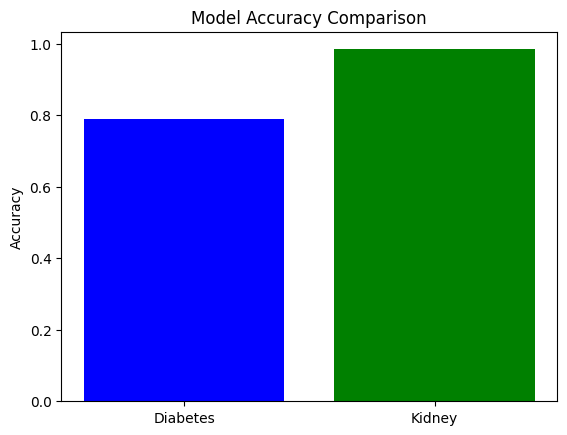

C:\Users\z004j5vt\AppData\Local\Temp\ipykernel_40032\1156656903.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


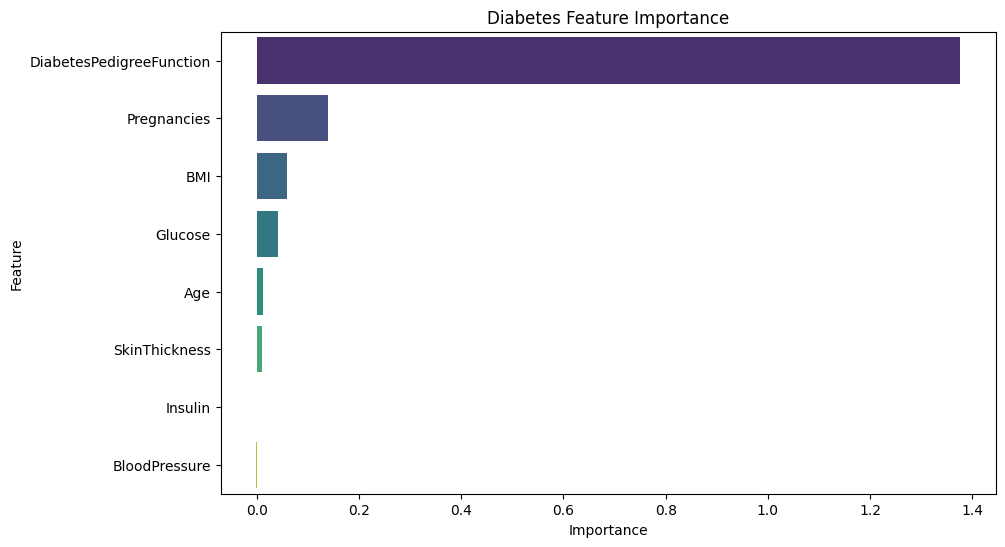

C:\Users\z004j5vt\AppData\Local\Temp\ipykernel_40032\1156656903.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


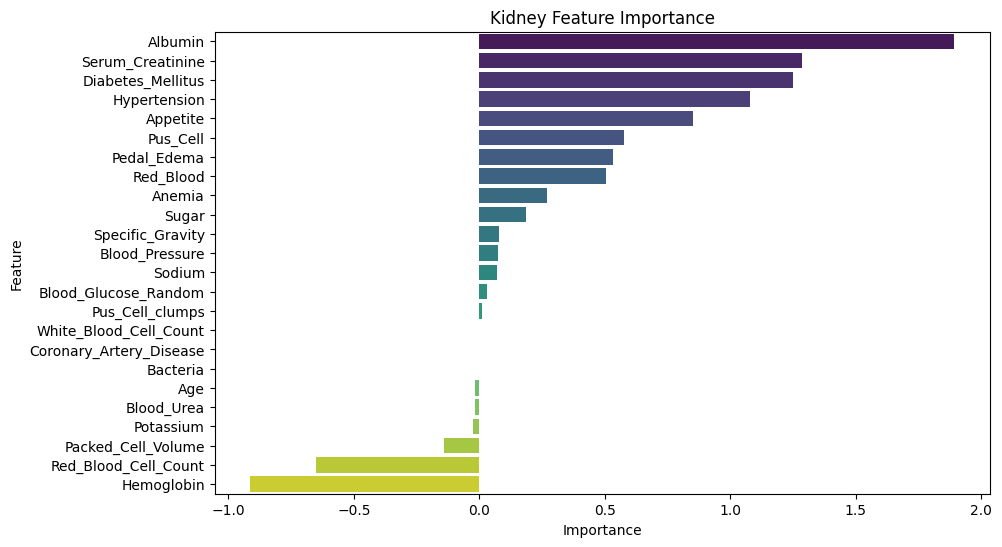

In [81]:
# Load preprocessed data (replace with actual file names)
diabetes_data = pd.read_csv('diabetes.csv')
kidney_data = pd.read_csv('KidneyDisease.csv')
    

# Define features and target for diabetes
diabetes_features = diabetes_data.drop('Outcome', axis=1)
diabetes_target = diabetes_data['Outcome']

# Define features and target for kidney disease
kidney_features = kidney_data.drop('Outcome', axis=1)
kidney_target = kidney_data['Outcome']

# Split the data into training and testing sets
'''
diabetes_features: This is the set of features (independent variables) for your machine learning model. It contains the input data that the model will use to make predictions.

diabetes_target: This is the target variable (dependent variable) for your machine learning model. It contains the corresponding labels or outcomes that the model is trying to predict.

test_size=0.2: This parameter specifies the proportion of the dataset that should be used for testing. In this case, 20% of the data will be reserved for testing,
and the remaining 80% will be used for training the model.

random_state=42: This parameter sets a seed for the random number generator. Setting a seed ensures reproducibility. If you use the same seed,
you'll get the same split each time you run the code. The number 42 is an arbitrary choice; you could use any integer.

train_test_split: This function takes the features and target variables and splits them into training and testing sets. It returns four sets of data:

diabetes_X_train: The features for training the model.
diabetes_X_test: The features for testing the model.
diabetes_y_train: The target variable for training the model.
diabetes_y_test: The target variable for testing the model.
After running this code, you would typically use diabetes_X_train and diabetes_y_train to train your machine learning model and diabetes_X_test to evaluate its performance on unseen data.
This separation helps assess how well the model generalizes to new, unseen examples.
'''


diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_features, diabetes_target, test_size=0.2, random_state=42
)

kidney_X_train, kidney_X_test, kidney_y_train, kidney_y_test = train_test_split(
    kidney_features, kidney_target, test_size=0.2, random_state=42
)

# Define logistic regression models
model_diabetes = LogisticRegression(max_iter=2000)
model_kidney = LogisticRegression(max_iter=2000)

# Train and evaluate models
model_diabetes, diabetes_accuracy, diabetes_report = train_and_evaluate_model(
    diabetes_X_train, diabetes_y_train, diabetes_X_test, diabetes_y_test, model_diabetes
)

model_kidney, kidney_accuracy, kidney_report = train_and_evaluate_model(
    kidney_X_train, kidney_y_train, kidney_X_test, kidney_y_test, model_kidney
)

# Save accuracy to a file
accuracy_df = pd.DataFrame({'Model': ['Diabetes', 'Kidney'], 'Accuracy': [diabetes_accuracy, kidney_accuracy]})
save_results_to_csv(accuracy_df, 'accuracy_results.csv')

# Save classification report to a file
report_df = pd.DataFrame({'Model': ['Diabetes', 'Kidney'], 'ClassificationReport': [diabetes_report, kidney_report]})
save_results_to_csv(report_df, 'classification_report_results.csv')

# Save feature importances to separate files
feature_importance_diabetes = pd.DataFrame({'Feature': diabetes_features.columns, 'Importance': model_diabetes.coef_[0]})
save_results_to_csv(feature_importance_diabetes, 'feature_importance_diabetes.csv')

feature_importance_kidney = pd.DataFrame({'Feature': kidney_features.columns, 'Importance': model_kidney.coef_[0]})
save_results_to_csv(feature_importance_kidney, 'feature_importance_kidney.csv')

# Create a visualization chart for model accuracy
print('********************************************')

print(f'diabetes_accuracy: {diabetes_accuracy}')
print(f'kidney_accuracy: {kidney_accuracy}')

print('********************************************')
fig, ax = plt.subplots()
models = ['Diabetes', 'Kidney']
accuracies = [diabetes_accuracy, kidney_accuracy]

ax.bar(models, accuracies, color=['blue', 'green'])
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
plt.savefig('accuracy_chart.png')
plt.show()

# Visualize feature importance for each model
plot_feature_importance(model_diabetes, diabetes_features.columns, title="Diabetes Feature Importance")
plot_feature_importance(model_kidney, kidney_features.columns, title="Kidney Feature Importance")


## Is the result satisfying ?
The initial strategy for developing prediction models centered around regression analysis; however, this approach encountered challenges, notably evidenced by the low accuracy observed in the diabetes model. A closer examination of feature importance unveiled inaccuracies, specifically with respect to two critical features, Insulin and blood pressure. Given their well-established roles in diabetes according to scientific literature, the discordance raised doubts about the reliability of the model's outcomes. Consequently, I applied Neural Network model as an alternative methodology for diabetes dataset. 


### B. Neural Network
Here are some reasons why we might choose to use a neural network to model a problem:

1. **Feature Learning:** 

   - Neural networks can automatically learn relevant features from raw data, reducing the need for manual feature engineering. This is particularly beneficial when dealing with high-dimensional and unstructured data, such as images, audio, and text.

2. **Adaptability:** 

   - Neural networks are highly adaptable to different types of data and problem domains. They can be used for a wide range of tasks, including classification, regression, clustering, and generation.
 
2. **End-to-End Learning:** 

   - Neural networks enable end-to-end learning, where the model learns directly from raw input to produce the desired output. This is advantageous in scenarios where manual feature extraction or intermediate steps might be challenging or not well-defined.
 


********************************************
diabetes_accuracy: 0.8421052631578947
********************************************


C:\Users\z004j5vt\AppData\Local\Temp\ipykernel_40032\1750669164.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


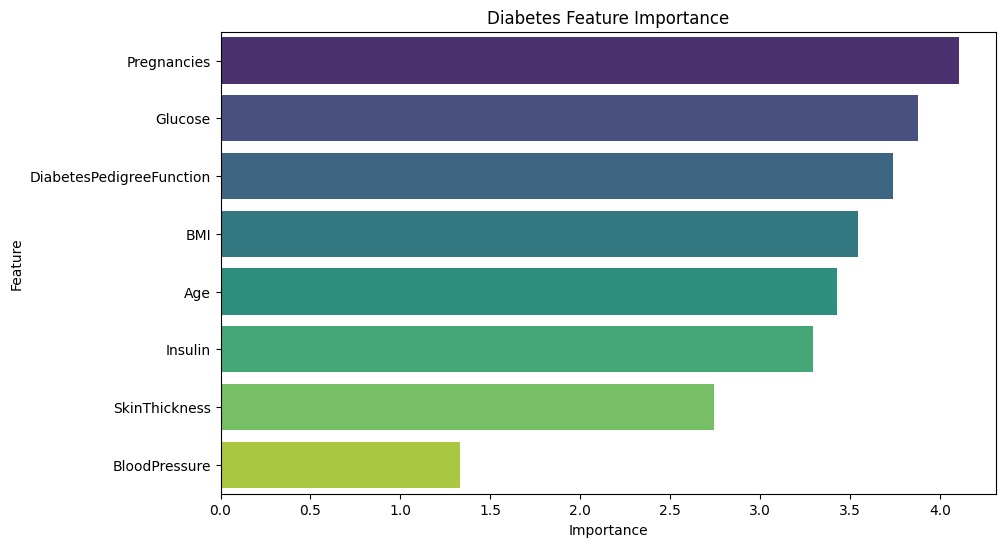

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

'''

X: This is the feature matrix (input data) for training the neural network. It's assumed to be a two-dimensional array or DataFrame where each row represents a sample, 
and each column represents a feature.

y: This is the target variable (output) for training the neural network. It's assumed to be a one-dimensional array or Series containing the labels or classes corresponding
 to each sample in `X`.

- `hidden_layer_sizes`: This parameter specifies the number of neurons in each hidden layer of the neural network. In this case, it's set to 
(8, 4), meaning there are two hidden layers, the first with 8 neurons and the second with 4 neurons. You can adjust this parameter to experiment with different architectures.

- `learning_rate_init`: This parameter determines the initial learning rate for the optimization algorithm. It controls the step size during the weight updates. 
In this case, it's set to `0.001`, but you can experiment with different values depending on the convergence behavior of your model.

- `max_iter`: This parameter specifies the maximum number of iterations (epochs) for training the neural network. It determines how many times the entire 
training dataset is passed through the network during training. In this case, it's set to `1000`, but you may need to adjust it based on the convergence behavior of your model.

- `random_state`: This parameter is used to seed the random number generator. It ensures that the random initialization of the neural network weights is reproducible.
 The specific value `42` is an arbitrary choice, and you can use any integer value.

The function, when called with appropriate arguments, trains a neural network on the provided data (`X` and `y`) with the specified architecture and training parameters. 
The trained model and its accuracy on a validation set (not explicitly shown in the provided code) can be returned or used for further analysis.

'''
def train_neural_network(X, y, hidden_layer_sizes=(8, 4), learning_rate_init=0.001, max_iter=1000, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the MLP model
    mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, max_iter=max_iter, random_state=random_state)

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp_model.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    

    # Return the trained model
    return mlp_model, accuracy



def plot_feature_importance(model, feature_names,title):
    # Accessing the coefficients (weights) of the first layer
    first_layer_weights = model.coefs_[0]

    # Taking the absolute values to emphasize the importance, assuming positive and negative values are both important
    importance = abs(first_layer_weights).sum(axis=1)

    # Creating a DataFrame for better visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

    # Sorting features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(title)
    plt.show()

# Load your dataset
def plot_accuracy_comparison(accuracies, labels):
    # Plotting the bar chart
    plt.bar(labels, accuracies, color=['blue', 'orange'])
    plt.ylim(0, 1)  # Setting y-axis limits to represent accuracy percentage
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.show()

 



#####  diabetes ######
df2 = pd.read_csv('diabetes.csv')
# Assume 'target' is the name of your target variable
X2 = df2.drop('Outcome', axis=1)
y2 = df2['Outcome']
#print('The information about modeling diabetes')
feature_names2 = X2.columns.tolist()
# Train the neural network
mlp_model2, diabetesaccuracy = train_neural_network(X2, y2)

# Plot accuracy

print('********************************************')
print(f'diabetes_accuracy: {diabetesaccuracy}')
 
print('********************************************')
#plot_accuracy_comparison([  diabetesaccuracy], [  'diabetesaccuracy'])

# Plot feature importance
 
 
plot_feature_importance(mlp_model2, feature_names2, "Diabetes Feature Importance")


## 3. Results 



Taking into account the insights gleaned from the preceding sections, the ultimate model for the diabetes dataset was successfully crafted using a Neural Network, leveraging its capacity to capture intricate relationships and address the limitations encountered with the initial regression-based approach. In contrast, for the kidney disease dataset, the final model was generated using a regression approach. The next cell summarizes the previous results and shows the integration of these results, providing a comprehensive integration of the results predicting diabetes and kidney disease. This integrated analysis provides a comprehensive view of predictive models for each data set to optimize accuracy and relevance.


********************************************
diabetes_accuracy: 0.8421052631578947
kidney_accuracy: 0.9841269841269841
********************************************


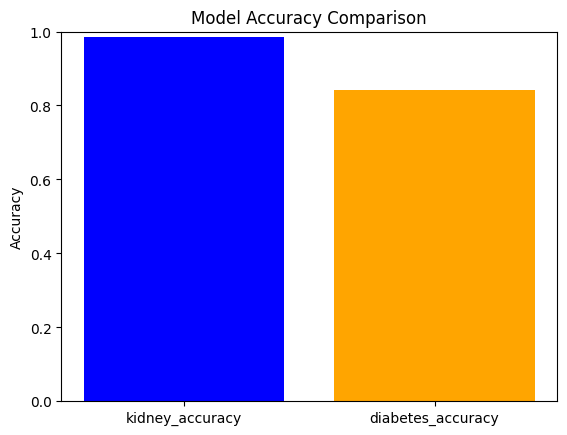

C:\Users\z004j5vt\AppData\Local\Temp\ipykernel_40032\1599570346.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


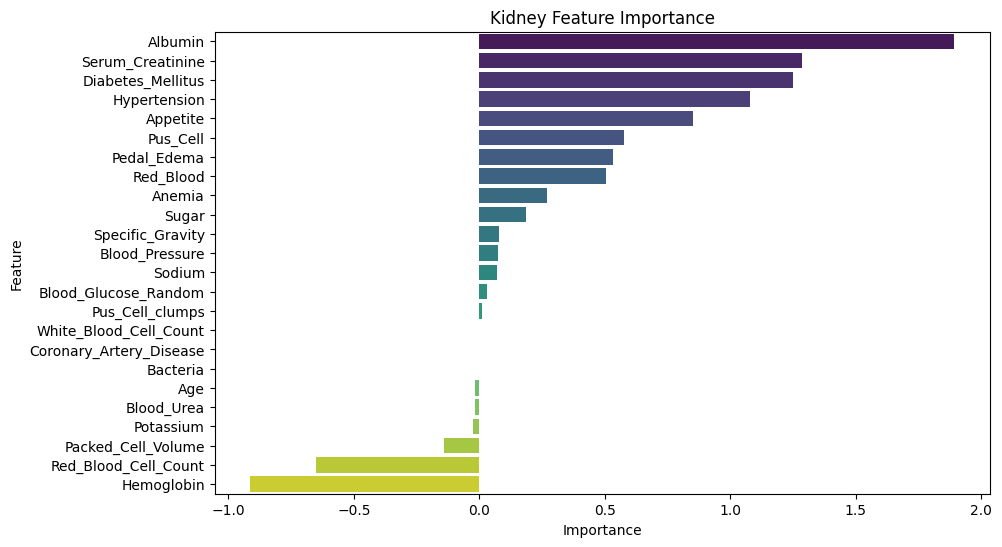

C:\Users\z004j5vt\AppData\Local\Temp\ipykernel_40032\1599570346.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


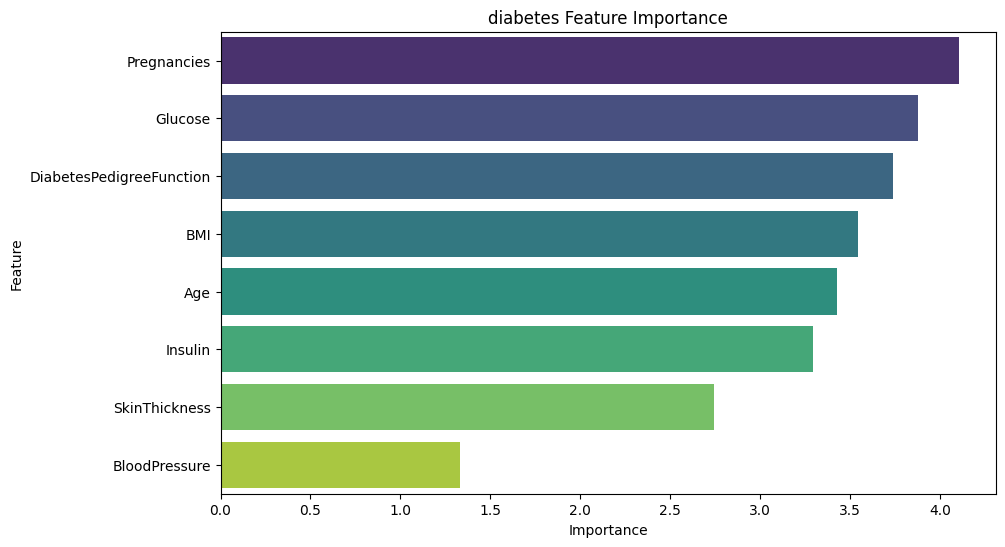

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model(X_train, y_train, X_test, y_test, model):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    return model, accuracy, report


### Get feature importances from the model _accuracy, _accuracy
def kidney_feature_importance(model, feature_names, title):
    # Get feature importances from the model
    if hasattr(model, 'coef_'):
        feature_importance = model.coef_[0]
    else:
        raise ValueError("Model doesn't have a 'coef_' attribute for feature importance.")

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(title)
    plt.show()

def diabetes_feature_importance(model, feature_names,title):
    # Accessing the coefficients (weights) of the first layer
    first_layer_weights = model.coefs_[0]

    # Taking the absolute values to emphasize the importance, assuming positive and negative values are both important
    importance = abs(first_layer_weights).sum(axis=1)

    # Creating a DataFrame for better visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

    # Sorting features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(title)
    plt.show()


### Save the results to a CSV file
def save_results_to_csv(results_df, filename='model_results.csv'):
    
    results_df.to_csv(filename, index=False)


def train_neural_network(X, y, hidden_layer_sizes=(8, 4), learning_rate_init=0.001, max_iter=1000, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the MLP model
    mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, max_iter=max_iter, random_state=random_state)

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp_model.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #report = classification_report(y_test, y_pred)

    # Return the trained model
    return mlp_model, accuracy

 



# Load your dataset
def plot_accuracy_comparison(accuracies, labels):
    # Plotting the bar chart
    plt.bar(labels, accuracies, color=['blue', 'orange'])
    plt.ylim(0, 1)  # Setting y-axis limits to represent accuracy percentage
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.show()    




#################################################  Kidney model  #####################################################
 
kidney_data = pd.read_csv('KidneyDisease.csv')     
# Define features and target for kidney disease
kidney_features = kidney_data.drop('Outcome', axis=1)
kidney_target = kidney_data['Outcome']

# Split the data into training and testing sets

kidney_X_train, kidney_X_test, kidney_y_train, kidney_y_test = train_test_split(
    kidney_features, kidney_target, test_size=0.2, random_state=42
)

# Define logistic regression models
 
model_kidney = LogisticRegression(max_iter=2000)

model_kidney, kidney_accuracy, kidney_report = train_and_evaluate_model(
    kidney_X_train, kidney_y_train, kidney_X_test, kidney_y_test, model_kidney
)




#################################################  diabetes model    #####################################################
diabetes_data = pd.read_csv('diabetes.csv')
# Assume 'target' is the name of your target variable
X2 = diabetes_data.drop('Outcome', axis=1)
y2 = diabetes_data['Outcome']
#print('The information about modeling diabetes')
diabetes_features = X2.columns.tolist()
# Train the neural network 
diabetes_model, diabetes_accuracy = train_neural_network(X2, y2)

###################################################   Results  ##########################################################


print('********************************************')
print(f'diabetes_accuracy: {diabetes_accuracy}')
 

 
print(f'kidney_accuracy: {kidney_accuracy}')
print('********************************************')
 
 


plot_accuracy_comparison([kidney_accuracy, diabetes_accuracy], ['kidney_accuracy', 'diabetes_accuracy'])


 
kidney_feature_importance(model_kidney, kidney_features.columns, title="Kidney Feature Importance")



diabetes_feature_importance(diabetes_model, diabetes_features, "diabetes Feature Importance")


## 4 Discussion/ Conclusion


* In the assessment of kidney disease prediction using the regression method, a commendable accuracy of 98% was achieved. 

* In contrast, employing a regression method for the diabetes dataset resulted in an unreliable model characterized by low accuracy and incorrect feature importance chart. Subsequently, a Neural Network approach significantly improved the accuracy of the diabetes model by 84%, producing an acceptable feature importance chart that aligns with established scientific knowledge. 

* Looking at the feature importance diagram of diabetes, it can be seen that the number of pregnancies and glucose level have the greatest effect on diabetes.
The article on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7153959/  confirms this finding about the effect of number of pregnancies.

* An intriguing revelation from the feature importance chart of kidney disease  highlighted the reverse relationship of certain features, such as Hemoglobin and red blood cell count, with kidney disease. According to scientific documents, this aligns with the common consequence of kidney disease, where anemia, characterized by a decrease in red blood cells or hemoglobin, is prevalent. The feature importance chart indicated that as these features decrease, the possibility of kidney disease increases, validating the model's outcomes. 


* Furthermore , The feature-importance chart for the kidney model reveals that three important factors in the diagnosis of kidney disease are : Albumin, Serum_Creatinine and Diabetes_Mellitus. Diabetes Mellitus as a crucial factor, substantiating the relationship between kidney disease and diabetes. This finding is corroborated by scientific literature, such as that presented by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)[1]:

  https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/diabetic-kidney-disease
  [1] Centers for Disease Control and Prevention. Chronic Kidney Disease in the United States, 2019. Atlanta, GA: US Department of Health and Human Services. Centers for Disease Control and Prevention; 2019.

 which emphasizes diabetes as a cause of kidney disease. The integrated results underscore the efficacy of employing diverse modeling methodologies tailored to the specific characteristics of each dataset, ultimately enhancing the reliability and clinical relevance of predictive models for kidney and diabetes diseases.

* Furthermore, in the feature measurements, we identified two common important features, namely blood sugar and blood pressure, in both diabetes and kidney diseases. This result is validated by scientific documents, including an article presented on the Centers for Disease Control and Prevention (CDC), underscoring the significance of these parameters in managing both diabetes and kidney disease (https://www.cdc.gov/diabetes/managing/diabetes-kidney-disease.html). The integration of these common features further enhances the coherence and clinical relevance of the predictive models for both kidney and diabetes diseases.

* Another thing I would like to point out is that the diabetes dataset only contains information about women. On the other hand, in the kidney disease dataset, we don't have the gender feature and we don't know which records belong to men or women. So, I think that if we had gender feature in both datasets, we could have analyzed more details or commonalities between kidney disease and diabetes. Because sometimes the normal values of a factor or blood characteristic are different between men and women and lead to different diagnosis.
 






  